In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import utils

In [2]:
color_pal = sns.color_palette()

## Reading in files and indexing them on time

In [3]:
targets_a = pd.read_parquet('../data/A/train_targets.parquet')
targets_b = pd.read_parquet('../data/B/train_targets.parquet')
targets_c = pd.read_parquet('../data/C/train_targets.parquet')
targets_a = targets_a.set_index('time')
targets_b = targets_b.set_index("time")
targets_c = targets_c.set_index("time")


In [4]:
X_train_observed_a = pd.read_parquet('../data/A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('../data/B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('../data/C/X_train_observed.parquet')
X_train_observed_a = X_train_observed_a.set_index("date_forecast")
X_train_observed_b = X_train_observed_b.set_index("date_forecast")
X_train_observed_c = X_train_observed_c.set_index("date_forecast")


In [5]:
X_train_estimated_a = pd.read_parquet('../data/A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('../data/B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('../data/C/X_train_estimated.parquet')
X_train_estimated_a = X_train_estimated_a.set_index("date_forecast")
X_train_estimated_b = X_train_estimated_b.set_index("date_forecast")
X_train_estimated_c = X_train_estimated_c.set_index("date_forecast")


In [6]:
X_test_estimated_a = pd.read_parquet('../data/A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('../data/B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('../data/C/X_test_estimated.parquet')
X_test_estimated_a = X_test_estimated_a.set_index("date_forecast")
X_test_estimated_b = X_test_estimated_b.set_index("date_forecast")
X_test_estimated_c = X_test_estimated_c.set_index("date_forecast")


## Some EDA

In [7]:
X_train_observed_a.describe()

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
count,118669.000000,118669.000000,96422.000000,1.186690e+05,118669.000000,110603.000000,118669.000000,118669.000000,118669.000000,1.186690e+05,...,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000
mean,6.652576,1.249064,2907.949219,5.994018e+05,166.500381,1737.142212,0.022398,276.823395,44.918282,1.617057e+05,...,179.629486,1.529545,0.059087,280.708557,74.401077,32446.992188,3.043197,0.756781,0.517437,0.000019
std,2.796349,0.036319,2570.413086,8.795423e+05,244.945358,1815.584106,0.190367,6.701763,64.786697,2.301970e+05,...,103.779366,24.146885,0.109496,6.573763,33.515800,17968.044922,1.779247,2.856113,1.851790,0.001392
min,0.700000,1.145000,27.799999,0.000000e+00,0.000000,27.900000,-1.000000,250.899994,0.000000,0.000000e+00,...,0.002000,-50.004002,0.000000,258.899994,0.000000,154.300003,0.000000,-7.300000,-9.300000,-0.000000
25%,4.400000,1.224000,1102.900024,0.000000e+00,0.000000,590.700012,0.000000,272.100006,0.000000,0.000000e+00,...,88.487999,-15.066000,0.000000,275.899994,54.799999,15592.400391,1.700000,-1.400000,-0.700000,0.000000
50%,6.300000,1.247000,1882.400024,3.574770e+04,8.600000,1162.599976,0.000000,277.200012,4.100000,2.481410e+04,...,179.436996,1.202000,0.000000,280.700012,93.699997,36359.800781,2.700000,0.400000,0.500000,0.000000
75%,8.600000,1.272000,3969.750000,1.037819e+06,288.799988,2079.600098,0.000000,282.000000,76.000000,2.743256e+05,...,270.640991,18.995001,0.100000,285.200012,99.900002,48084.500000,4.100000,2.700000,1.700000,0.000000
max,17.500000,1.427000,12328.500000,3.005720e+06,836.400024,11688.700195,1.000000,293.799988,345.700012,1.205498e+06,...,359.997986,49.999001,1.400000,303.299988,100.000000,71349.898438,15.200000,12.300000,8.600000,0.100000


In [8]:
X_train_observed_b.describe()

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
count,116929.000000,116929.000000,98157.000000,1.169290e+05,116929.000000,109456.000000,116929.000000,116929.000000,116929.000000,1.169290e+05,...,116929.000000,116929.000000,116929.000000,116929.000000,116929.000000,116929.000000,116929.000000,116929.000000,116929.000000,116929.000000
mean,6.125604,1.254262,2651.450439,5.421514e+05,150.597580,1731.706665,0.008484,275.524536,40.894447,1.472200e+05,...,179.569458,-0.322831,0.059315,279.630524,73.500275,33040.113281,3.122094,0.750841,0.548524,0.000027
std,2.727944,0.035289,2404.853516,8.400522e+05,233.948273,1726.011108,0.117327,6.773766,61.530506,2.187106e+05,...,103.222916,24.058186,0.110211,6.634622,33.893852,18019.267578,1.827768,2.946939,1.881538,0.001654
min,0.700000,1.151000,27.799999,0.000000e+00,0.000000,27.900000,-1.000000,250.899994,0.000000,0.000000e+00,...,0.002000,-50.004002,0.000000,258.899994,0.000000,169.199997,0.000000,-7.300000,-9.300000,0.000000
25%,4.100000,1.230000,1037.900024,0.000000e+00,0.000000,648.799988,0.000000,271.100006,0.000000,0.000000e+00,...,89.507004,-17.388000,0.000000,275.000000,52.700001,16502.699219,1.700000,-1.500000,-0.700000,0.000000
50%,5.500000,1.254000,1732.300049,1.271020e+04,0.000000,1219.800049,0.000000,275.299988,0.000000,1.398140e+04,...,179.457001,-0.276000,0.000000,278.799988,92.599998,37614.101562,2.800000,0.400000,0.600000,0.000000
75%,8.000000,1.277000,3412.199951,8.693612e+05,242.000000,2074.100098,0.000000,280.799988,69.000000,2.484388e+05,...,269.739014,16.606001,0.100000,284.200012,99.900002,48268.601562,4.200000,2.700000,1.700000,0.000000
max,17.500000,1.426000,12328.799805,3.005700e+06,836.400024,11688.900391,1.000000,293.799988,345.700012,1.205341e+06,...,359.998993,49.998001,1.400000,303.299988,100.000000,70618.898438,15.200000,12.400000,8.600000,0.100000


In [9]:
X_train_observed_c.describe()

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
count,116825.000000,116825.000000,96902.000000,1.168250e+05,116825.000000,108313.000000,116825.000000,116825.000000,116825.000000,1.168250e+05,...,116825.000000,116825.000000,116825.000000,116825.000000,116825.000000,116825.000000,116825.000000,116825.000000,116825.000000,116825.000000
mean,6.013866,1.253214,2605.747559,5.423583e+05,150.655075,1710.178467,-0.013867,275.147400,40.920612,1.473144e+05,...,179.576492,-0.334226,0.062269,279.682556,73.351135,33186.710938,2.855492,0.739988,0.838296,0.000211
std,2.789840,0.038392,2415.117920,8.404843e+05,234.069214,1751.569336,0.369077,7.103381,61.696342,2.192759e+05,...,103.210327,24.077934,0.114863,6.675199,34.580784,18169.167969,1.632607,2.418446,1.928824,0.011781
min,0.500000,1.139000,27.799999,0.000000e+00,0.000000,27.900000,-1.000000,247.300003,0.000000,0.000000e+00,...,0.003000,-50.042000,0.000000,257.899994,0.000000,130.600006,0.000000,-6.300000,-8.800000,-0.100000
25%,4.000000,1.228000,981.400024,0.000000e+00,0.000000,618.500000,0.000000,270.600006,0.000000,0.000000e+00,...,89.529999,-17.424999,0.000000,275.000000,52.599998,16388.000000,1.600000,-0.900000,-0.500000,0.000000
50%,5.400000,1.253000,1643.000000,1.267980e+04,0.000000,1178.400024,0.000000,274.899994,0.000000,1.394200e+04,...,179.462997,-0.288000,0.000000,278.899994,93.300003,37765.199219,2.500000,0.400000,0.900000,0.000000
75%,7.900000,1.277000,3406.175049,8.698632e+05,242.000000,2056.399902,0.000000,280.600006,68.900002,2.478511e+05,...,269.747009,16.603001,0.100000,284.299988,99.900002,48576.000000,3.800000,2.300000,2.000000,0.000000
max,18.900000,1.441000,12431.299805,3.007722e+06,837.000000,11665.700195,1.000000,295.100006,344.500000,1.217465e+06,...,359.998993,50.036999,1.400000,303.200012,100.000000,72215.000000,14.300000,11.400000,9.000000,0.100000


In [10]:
targets_a.describe()

,pv_measurement
count,34085.000000
mean,630.594707
std,1165.902422
min,0.000000
25%,0.000000
50%,5.940000
75%,678.040000
max,5733.420000


In [11]:
# Notice that missing rows are simply non-existent for Y_train_a, not filled with NaN or anything
# From 21. october
display(targets_a[29660:29670])

,pv_measurement
time,
2022-10-20 18:00:00,0.0
2022-10-20 19:00:00,0.0
2022-10-20 20:00:00,0.0
2022-10-20 21:00:00,0.0
2022-10-20 22:00:00,0.0
2022-10-20 23:00:00,0.0
2022-10-21 00:00:00,0.0
2022-10-28 22:00:00,0.0
2022-10-28 23:00:00,0.0


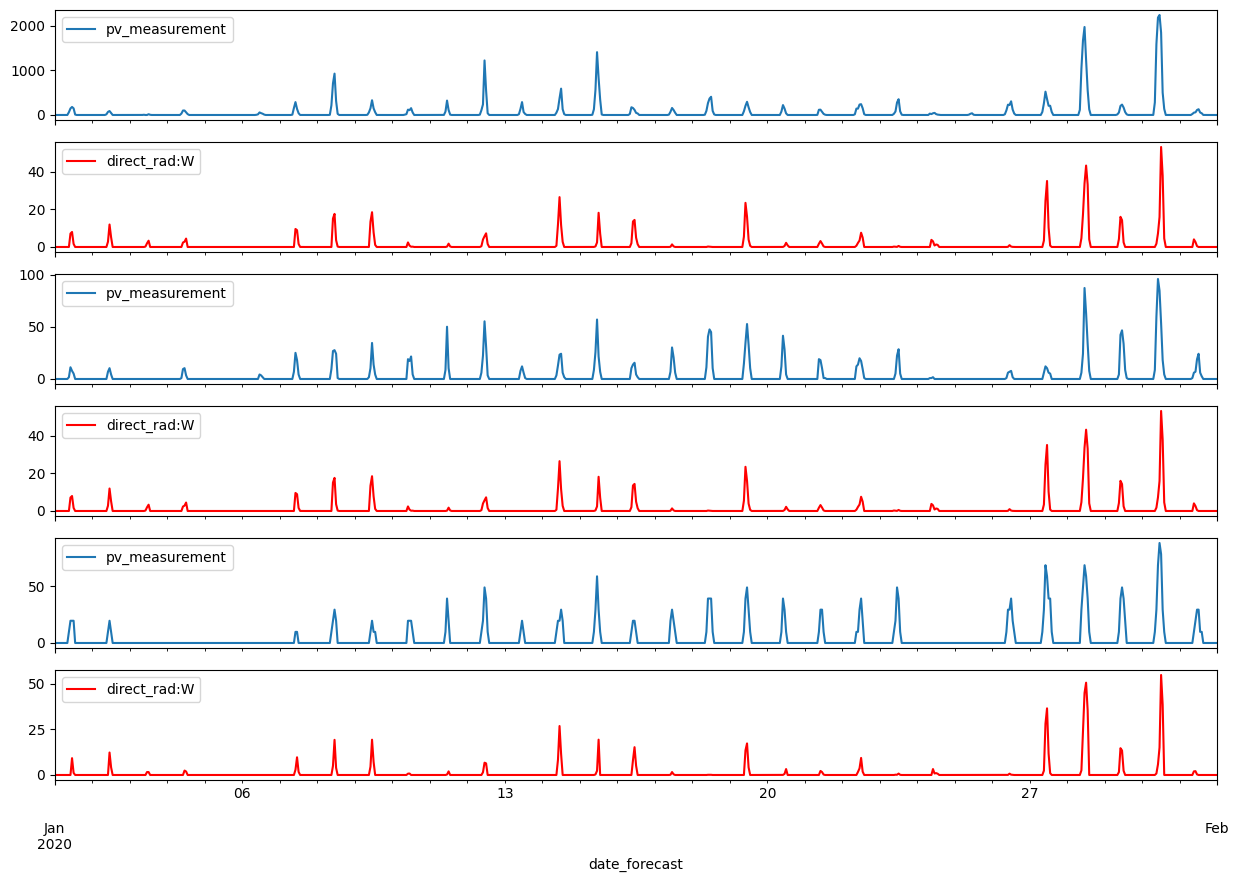

In [12]:
### generalized plotting
start_date = '01-2020'
end_date = '02-2020'

feature_name = "direct_rad:W"

Y = [targets_a, targets_b, targets_c]
X = [X_train_observed_a, X_train_observed_b, X_train_observed_c, ]

utils.plot_ts1(y=Y, 
              x=X, 
              feature=feature_name, 
              start=start_date, 
              end=end_date, 
              shareX=True)

## Data Preprocessing

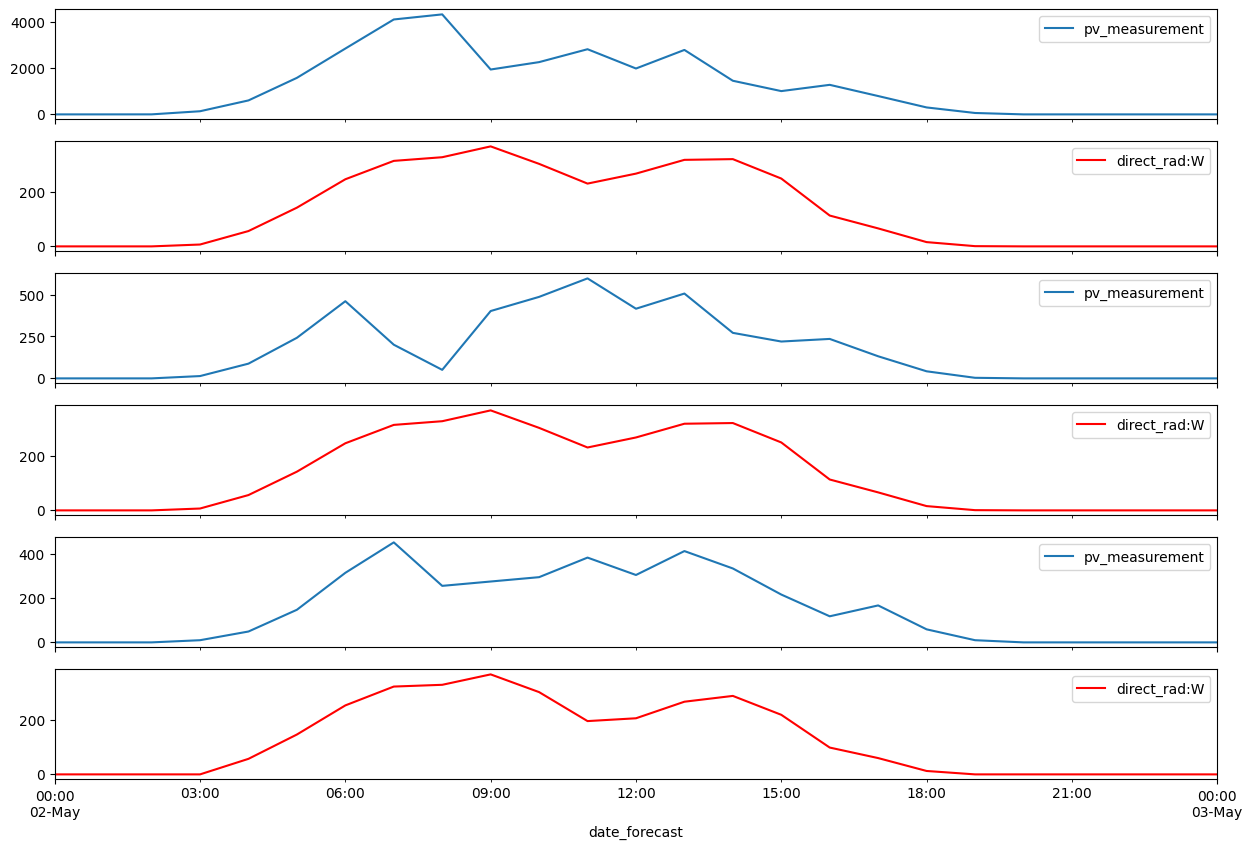

In [13]:
# removing rows where pv_measurment remains the same for more than 18 hours.
targets_a = utils.remove_constant_values(targets_a, "pv_measurement", 18).dropna()
targets_b = utils.remove_constant_values(targets_b, "pv_measurement", 18).dropna()
targets_c = utils.remove_constant_values(targets_c, "pv_measurement", 18).dropna()

Y = [targets_a, targets_b, targets_c]
X = [X_train_observed_a, X_train_observed_b, X_train_observed_c, ]

start_date = '05-02-2021'
end_date = '05-03-2021'
feature_name = "direct_rad:W"

utils.plot_ts1(y=Y, 
              x=X, 
              feature=feature_name, 
              start=start_date, 
              end=end_date, 
              shareX=True)

In [14]:
### Adding more time based features to the datasets
X_train_observed_a = utils.create_features(X_train_observed_a)
X_train_observed_b = utils.create_features(X_train_observed_b)
X_train_observed_c = utils.create_features(X_train_observed_c)

X_train_estimated_a = utils.create_features(X_train_estimated_a)
X_train_estimated_b = utils.create_features(X_train_estimated_b)
X_train_estimated_c = utils.create_features(X_train_estimated_c)

X_test_estimated_a = utils.create_features(X_test_estimated_a)
X_test_estimated_b = utils.create_features(X_test_estimated_b)
X_test_estimated_c = utils.create_features(X_test_estimated_c)

In [15]:
### Using only observed weather for training
# Join the y values into x-dataframes for training
train_a = pd.merge(X_train_observed_a, targets_a, left_index=True, right_index=True)
train_b = pd.merge(X_train_observed_b, targets_b, left_index=True, right_index=True)
train_c = pd.merge(X_train_observed_c, targets_c, left_index=True, right_index=True)


In [16]:
### Using estimated weather as validation set
# val_a = pd.merge(X_train_estimated_a, targets_a, left_index=True, right_index=True)
# val_b = pd.merge(X_train_estimated_b, targets_b, left_index=True, right_index=True)
# val_c = pd.merge(X_train_estimated_c, targets_c, left_index=True, right_index=True)

In [17]:
### Appending the estimated weather to the observed weather to use a mix of both in training
# train_a = pd.concat([X_train_observed_a, X_train_estimated_a], axis=0).drop("date_calc", axis=1)
# train_b = pd.concat([X_train_observed_b, X_train_estimated_b], axis=0).drop("date_calc", axis=1)
# train_c = pd.concat([X_train_observed_c, X_train_estimated_c], axis=0).drop("date_calc", axis=1)

In [18]:
# ### Join the y values into x-dataframes for training
# train_a = pd.merge(train_a, targets_a, left_index=True, right_index=True)
# train_b = pd.merge(train_b, targets_b, left_index=True, right_index=True)
# train_c = pd.merge(train_c, targets_c, left_index=True, right_index=True)


In [19]:
# Check which features most correlated with y
correlations = train_a.corrwith(train_a["pv_measurement"])
for index, corr in correlations.items():
    correlations[index] = abs(corr)

sorted = correlations.sort_values(ascending=False)
best_features = list(sorted[1:10].index)
print(best_features)

['direct_rad:W', 'direct_rad_1h:J', 'clear_sky_rad:W', 'clear_sky_energy_1h:J', 'diffuse_rad:W', 'sun_elevation:d', 'diffuse_rad_1h:J', 'is_in_shadow:idx', 'is_day:idx']


## Create our model

In [20]:
FEATURES = list(train_a.columns[:-1]) # Using all the features of X.
TARGETS = "pv_measurement"

### DATA
X_a = train_a[FEATURES]
y_a = train_a[TARGETS]
X_b = train_b[FEATURES]
y_b = train_b[TARGETS]
X_c = train_c[FEATURES]
y_c = train_c[TARGETS]

### Location A

In [62]:
### Location A

### If using validation set, split the data into training and testing sets 
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, y_a, test_size=0.2, random_state=42)

# Create an XGBoostRegressor with some default hyperparameters
reg_A = xgb.XGBRegressor(
    n_estimators=1000,  
    early_stopping_rounds=100,
    learning_rate=0.01,
    objective='reg:absoluteerror', 
)

# Fit the model on the training data
reg_A.fit(X_train_a, y_train_a,
        eval_set = [(X_train_a, y_train_a), (X_test_a, y_test_a)],
        verbose=100)

# Make predictions on the test data
y_pred_a = reg_A.predict(X_test_a)

y_pred_a = np.clip(y_pred_a, a_min=0, a_max=None)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_a, y_pred_a)

print(f"Mean Absolute Error: {mae}")

[0]	validation_0-mae:712.15018	validation_1-mae:715.16230
[100]	validation_0-mae:345.68088	validation_1-mae:349.52726
[200]	validation_0-mae:247.71925	validation_1-mae:252.37404
[300]	validation_0-mae:219.36572	validation_1-mae:226.59995
[400]	validation_0-mae:209.94677	validation_1-mae:218.45014
[500]	validation_0-mae:206.63736	validation_1-mae:216.23496
[600]	validation_0-mae:204.63643	validation_1-mae:215.26168
[700]	validation_0-mae:203.32664	validation_1-mae:214.61887
[800]	validation_0-mae:202.29832	validation_1-mae:214.07758
[900]	validation_0-mae:200.99822	validation_1-mae:213.49678
[999]	validation_0-mae:199.88998	validation_1-mae:212.98950
Mean Absolute Error: 212.9287365732344


### Location B

In [36]:
### Location B

# Split the data into training and testing sets
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size=0.2, shuffle=False)

# Create an XGBoostRegressor with some default hyperparameters
reg_B = xgb.XGBRegressor(
    n_estimators=1000,  
    early_stopping_rounds=100,
    learning_rate=0.01,
    objective='reg:absoluteerror', 
)

# Fit the model on the training data
reg_B.fit(X_train_b, y_train_b,
        eval_set = [(X_train_b, y_train_b), (X_test_b, y_test_b)],
        verbose=100)

# Make predictions on the test data
y_pred_b = reg_B.predict(X_test_b)

y_pred_b = np.clip(y_pred_b, a_min=0, a_max=None)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_b, y_pred_b)

print(f"Mean Absolute Error: {mae}")

[0]	validation_0-mae:146.68652	validation_1-mae:91.55534
[100]	validation_0-mae:67.84939	validation_1-mae:44.08633
[200]	validation_0-mae:44.93886	validation_1-mae:32.99865
[300]	validation_0-mae:37.62268	validation_1-mae:30.69729
[400]	validation_0-mae:35.03773	validation_1-mae:30.26834
[500]	validation_0-mae:33.73426	validation_1-mae:30.16412
[600]	validation_0-mae:33.31979	validation_1-mae:30.15522
[700]	validation_0-mae:33.00857	validation_1-mae:30.15759
[760]	validation_0-mae:32.88904	validation_1-mae:30.15096
Mean Absolute Error: 30.13513943892187


### Location C

In [37]:
### Location C

# Split the data into training and testing sets
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.2, shuffle=False)

# Create an XGBoostRegressor with some default hyperparameters
reg_C = xgb.XGBRegressor(
    n_estimators=1000,  
    early_stopping_rounds=100,
    learning_rate=0.01,
    objective='reg:absoluteerror', 
)

# Fit the model on the training data
reg_C.fit(X_train_c, y_train_c,
        eval_set = [(X_train_c, y_train_c), (X_test_c, y_test_c)],
        verbose=100)

# Make predictions on the test data
y_pred_c = reg_C.predict(X_test_c)

y_pred_c = np.clip(y_pred_c, a_min=0, a_max=None)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_c, y_pred_c)

print(f"Mean Absolute Error: {mae}")

[0]	validation_0-mae:127.74943	validation_1-mae:71.57605
[100]	validation_0-mae:61.12798	validation_1-mae:31.95272
[200]	validation_0-mae:39.67675	validation_1-mae:22.39095
[300]	validation_0-mae:32.97927	validation_1-mae:19.90035
[400]	validation_0-mae:30.65226	validation_1-mae:19.35381
[500]	validation_0-mae:29.66357	validation_1-mae:19.19359
[600]	validation_0-mae:29.11329	validation_1-mae:19.10492
[700]	validation_0-mae:28.77628	validation_1-mae:19.06669
[800]	validation_0-mae:28.58627	validation_1-mae:19.04887
[888]	validation_0-mae:28.43542	validation_1-mae:19.07028
Mean Absolute Error: 19.041357071626262


## Analysis

In [59]:
fi_a = pd.DataFrame(data=reg_A.feature_importances_,
             index=reg_A.feature_names_in_,
             columns=["importance"])
fi_a.sort_values("importance", ascending=False).head()

,importance
is_in_shadow:idx,0.814862
diffuse_rad:W,0.084488
sun_elevation:d,0.050386
direct_rad:W,0.005968
sun_azimuth:d,0.005610


In [39]:
fi_b = pd.DataFrame(data=reg_B.feature_importances_,
             index=reg_B.feature_names_in_,
             columns=["importance"])
fi_b.sort_values("importance", ascending=False).head()

,importance
is_in_shadow:idx,0.635574
sun_elevation:d,0.112275
clear_sky_rad:W,0.087063
diffuse_rad:W,0.069972
hour,0.011219


In [40]:
fi_c = pd.DataFrame(data=reg_C.feature_importances_,
             index=reg_C.feature_names_in_,
             columns=["importance"])
fi_c.sort_values("importance", ascending=False).head()

,importance
clear_sky_rad:W,0.377015
sun_elevation:d,0.251670
diffuse_rad:W,0.149421
clear_sky_energy_1h:J,0.026805
direct_rad:W,0.024006


<Axes: >

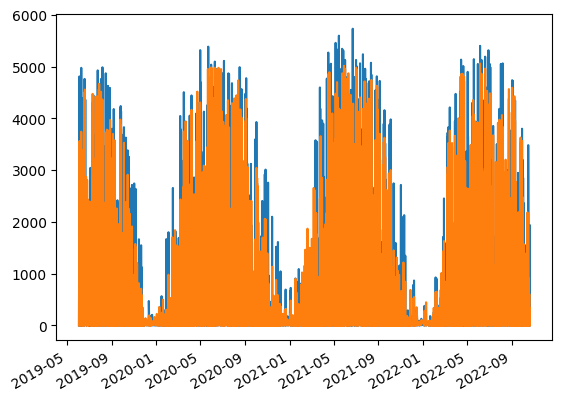

In [60]:
y_test_a.plot()
X_test_a["prediction"] = y_pred_a
X_test_a["prediction"].plot()

<Axes: >

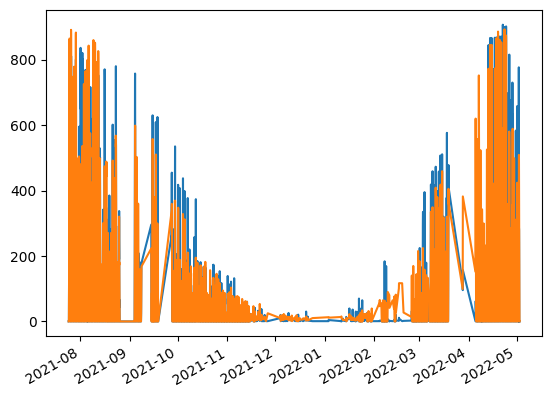

In [48]:
y_test_b.plot()
X_test_b["prediction"] = y_pred_b
X_test_b["prediction"].plot()

<Axes: >

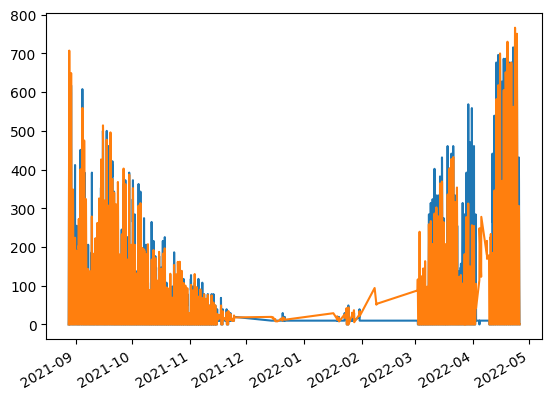

In [49]:
y_test_c.plot()
X_test_c["prediction"] = y_pred_c
X_test_c["prediction"].plot()

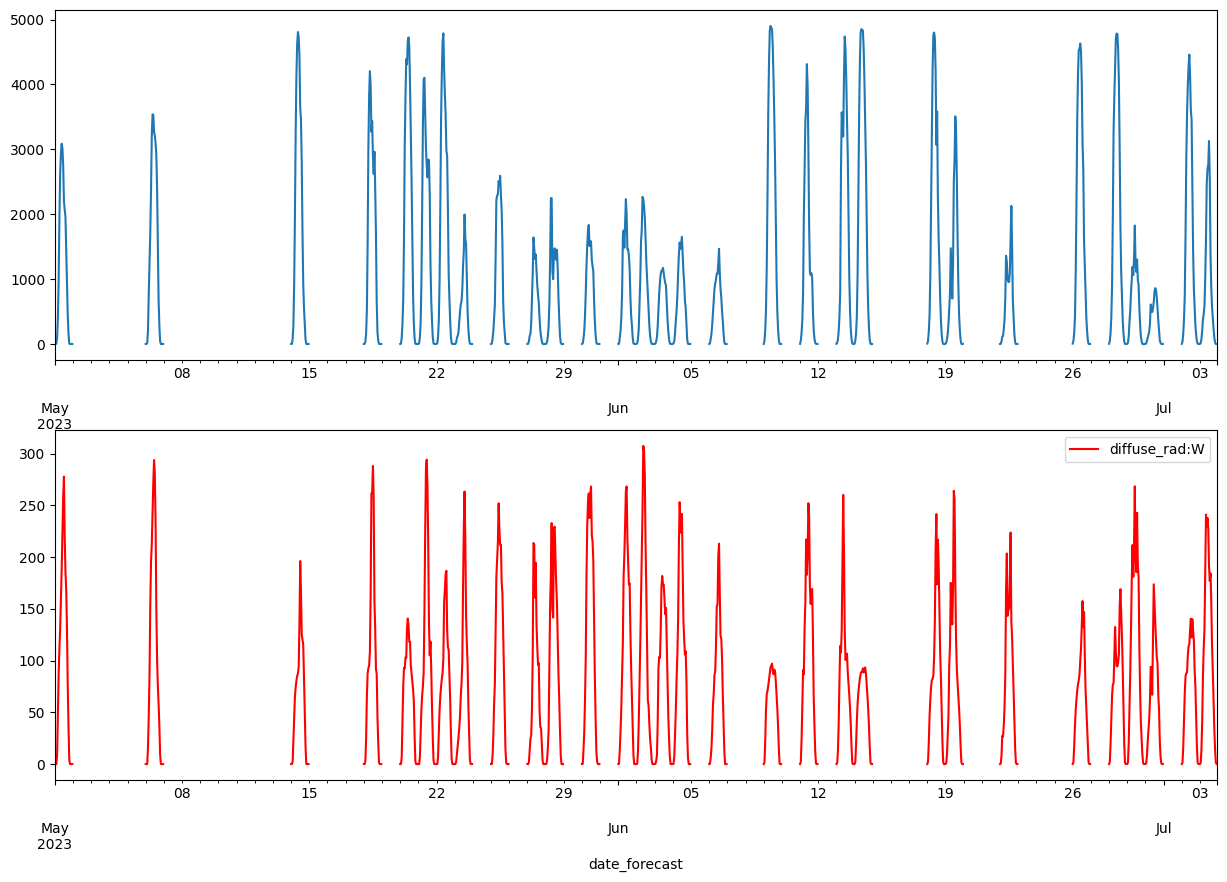

In [41]:
df = X_test_estimated_a.copy()
df["prediction"] = reg_A.predict(X_test_estimated_a[FEATURES])

start = "05-2023"
end = "08-2023"
feature = "diffuse_rad:W"

utils.plot_ts1([df["prediction"]], [df], start, end, feature, shareX=False)



2023-04-28 11:00:00    3380.666621
2023-04-28 12:00:00    3284.481836
2023-04-28 10:00:00    2802.069062
2023-03-23 13:00:00    2729.845977
2023-03-20 11:00:00    2550.840015
2023-04-08 11:00:00    2456.143774
2023-04-30 12:00:00    2447.274502
2023-04-04 08:00:00    2397.968423
2023-04-14 09:00:00    2348.424443
2023-04-28 14:00:00    2295.340547
2023-04-08 12:00:00    2248.184316
2023-03-26 09:00:00    2231.777935
2023-03-23 14:00:00    2173.483818
2023-04-16 08:00:00    2164.623477
2023-03-12 13:00:00    2090.227467
2023-04-11 12:00:00    1901.882363
2023-04-08 10:00:00    1826.524922
2023-04-08 13:00:00    1779.966938
2023-02-16 10:00:00    1764.492876
2022-10-30 10:00:00    1759.070498
2023-03-27 09:00:00    1717.854980
2023-03-09 12:00:00    1709.141309
2023-03-09 13:00:00    1684.654229
2023-04-11 11:00:00    1678.529287
2023-04-17 07:00:00    1668.958848
2023-04-11 08:00:00    1661.411323
2022-11-13 11:00:00    1659.943029
2023-04-16 09:00:00    1629.243955
2023-03-19 10:00:00 

Mean Absolute Error: 135.53911501567603


<Axes: >

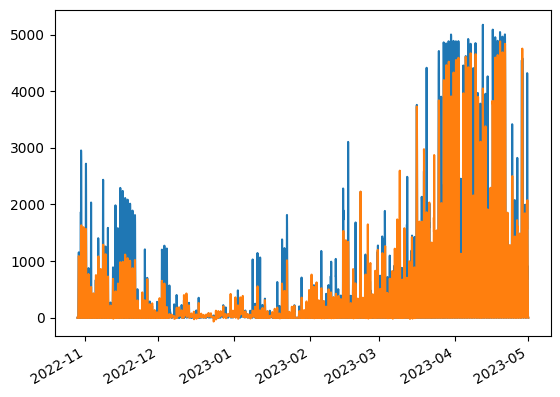

In [66]:
df = X_train_estimated_a[FEATURES]
df["prediction"] = reg_A.predict(X_train_estimated_a[FEATURES])

df = pd.merge(df, targets_a, left_index=True, right_index=True)

df["error"] = np.abs(df["pv_measurement"] - df["prediction"])
display(df["error"].sort_values(ascending=False).head(30))

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(df["pv_measurement"], df["prediction"])

print(f"Mean Absolute Error: {mae}")

df["pv_measurement"].plot()
df["prediction"].plot() 

2023-04-28 11:00:00    579.990563
2023-04-28 12:00:00    560.714487
2023-04-30 12:00:00    503.181627
2023-04-08 11:00:00    487.126923
2023-04-28 10:00:00    462.810244
2023-04-14 09:00:00    391.436772
2023-04-08 12:00:00    369.689193
2023-03-16 12:00:00    355.717310
2023-04-03 10:00:00    353.011924
2023-03-16 10:00:00    342.078957
2023-04-26 11:00:00    341.478806
2023-04-19 09:00:00    338.243510
2023-04-08 10:00:00    336.266715
2023-04-30 13:00:00    327.854967
2023-04-24 09:00:00    316.484620
2023-03-23 10:00:00    301.678422
2023-04-03 09:00:00    300.060867
2023-04-24 08:00:00    295.451022
2023-04-14 10:00:00    294.799121
2023-03-23 13:00:00    293.869509
2023-04-28 14:00:00    285.635436
2023-03-20 11:00:00    285.099786
2023-04-18 08:00:00    281.537782
2023-04-04 08:00:00    276.543195
2023-04-08 13:00:00    269.974997
2023-04-16 11:00:00    267.852036
2023-04-14 08:00:00    267.489077
2023-04-18 09:00:00    254.877572
2023-04-11 09:00:00    247.723154
2023-04-11 08:

Mean Absolute Error: 19.487886235158825


<Axes: >

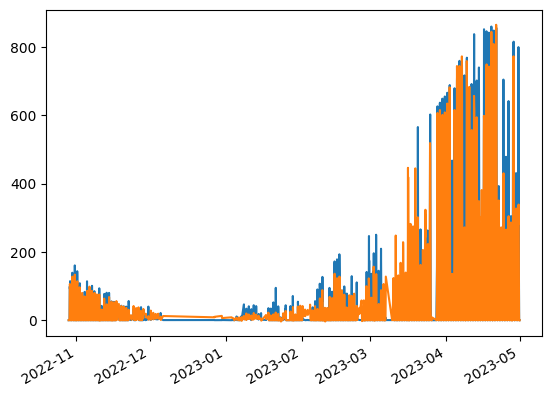

In [64]:
df = X_train_estimated_b[FEATURES]
df["prediction"] = reg_B.predict(X_train_estimated_b[FEATURES])

df = pd.merge(df, targets_b, left_index=True, right_index=True)

df["error"] = np.abs(df["pv_measurement"] - df["prediction"])
display(df["error"].sort_values(ascending=False).head(30))

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(df["pv_measurement"], df["prediction"])

print(f"Mean Absolute Error: {mae}")

df["pv_measurement"].plot()
df["prediction"].plot()

2023-03-19 10:00:00    367.296060
2023-04-14 11:00:00    329.997882
2023-04-07 09:00:00    319.013715
2023-04-24 09:00:00    311.982202
2023-03-27 12:00:00    308.378708
2023-03-27 11:00:00    307.993644
2023-04-28 11:00:00    300.169045
2023-03-23 13:00:00    283.776248
2023-04-28 14:00:00    276.423412
2023-04-24 10:00:00    270.800548
2023-03-19 09:00:00    267.377706
2023-04-28 12:00:00    266.713564
2023-04-28 13:00:00    258.845388
2023-03-19 11:00:00    257.090210
2023-03-27 10:00:00    253.422430
2023-04-28 16:00:00    245.694601
2023-04-28 10:00:00    244.826179
2023-03-23 14:00:00    234.894510
2023-04-16 09:00:00    234.613755
2023-03-28 10:00:00    233.645187
2023-04-05 10:00:00    229.441868
2023-04-16 08:00:00    228.309761
2023-04-13 10:00:00    227.365730
2023-04-02 11:00:00    225.087651
2023-03-27 13:00:00    214.298574
2023-04-30 09:00:00    209.076954
2023-04-07 10:00:00    209.014116
2023-02-04 10:00:00    207.606215
2023-04-02 12:00:00    205.790383
2023-03-27 09:

Mean Absolute Error: 23.724568187967904


<Axes: >

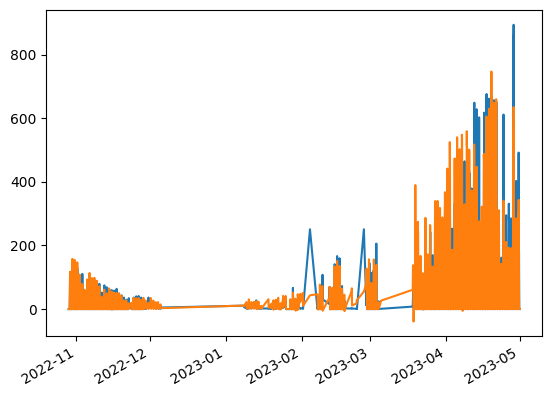

In [65]:
df = X_train_estimated_c[FEATURES]
df["prediction"] = reg_C.predict(X_train_estimated_c[FEATURES])

df = pd.merge(df, targets_c, left_index=True, right_index=True)

df["error"] = np.abs(df["pv_measurement"] - df["prediction"])
display(df["error"].sort_values(ascending=False).head(30))

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(df["pv_measurement"], df["prediction"])

print(f"Mean Absolute Error: {mae}")

df["pv_measurement"].plot()
df["prediction"].plot()


## Predicting on the actual test set

In [31]:
### Location B
X_test_estimated_a = X_test_estimated_a[FEATURES]
A_pred = reg_A.predict(X_test_estimated_a)
A_pred_hourly = []

# just taking the value every whole hour
for i in range(0, len(A_pred), 4):
    A_pred_hourly.append(A_pred[i])
    

In [32]:
### Location B
X_test_estimated_b = X_test_estimated_b[FEATURES]
B_pred = reg_B.predict(X_test_estimated_b)
B_pred_hourly = []

# just taking the value every whole hour
for i in range(0, len(B_pred), 4):
    B_pred_hourly.append(B_pred[i])

In [33]:
   
### Location C
X_test_estimated_c = X_test_estimated_c[FEATURES]
C_pred = reg_C.predict(X_test_estimated_c)
C_pred_hourly = []

# just taking the value every whole hour
for i in range(0, len(C_pred), 4):
    C_pred_hourly.append(C_pred[i])  

## Storing the predictions

In [34]:
predictions = np.concatenate([A_pred_hourly, B_pred_hourly, C_pred_hourly])
# remove negative predictions
predictions = np.clip(predictions, a_min=0, a_max=None)
ids = range(len(predictions))
df = pd.DataFrame({"id": ids, "prediction": predictions})
df.to_csv("saves/xgboost4.csv", index=False)